# 3D_skfda_extrapolation_demo2

In this notebook we illustrate how to peform extrapolation of data represented by a square matrix Z and we test it.
To do the testing we take a random matrix A of size 10x10.

1/ We split 10x10 matrix A into the inner 8x8 matrix Z, and 40x1 matrix eA that contains all four edges of A.

      Z, eA = remove_edges(A)
      
2/ We extrapolate Z from 8x8 to 10x10 matrix B using 

      B = extrapolate_xyz(Z=Z, H=1, x_start=1, y_start=11)
      
3/ Then we extract Z and eB from B, as we did in step 1

4/ Evaluate performance of approximation by computing RMSE for eA and eB

# How to install skfda
https://pypi.org/project/scikit-fda/

1. goto Anaconda command prompt and run CMD> pip install scikit-fda
2. if you get an error fix it as described below

  error: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/

# error: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/

To fix the error above to go
https://docs.microsoft.com/en-us/answers/questions/136595/error-microsoft-visual-c-140-or-greater-is-require.html

download vs_buildtools__618911391.1599087397.exe and follow the instructions



In [1]:
import skfda
import mpl_toolkits.mplot3d
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate
%matplotlib notebook

In [2]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

from sklearn.metrics import mean_squared_error as mse

# mse([1,2,3],[3,5,7],squared=False)

In [5]:
def remove_edges(M):
    assert M.shape[0]==M.shape[1] # verify it is a square matrix 
    M_last_row = M.shape[1]-1
    M_last_col = M.shape[0]-1
    
    M2 = M.copy()    # print('top row = ', Z[0,:])
    Z = np.delete(M2, ([0,M_last_row]), axis=0)
    Z = np.delete(Z, ([0,M_last_col]), axis=1)

    eM=np.hstack((M2[0,:], M2[M_last_row,:],  M2[:,0], M2[:,M_last_col]))
    
    return Z, eM

In [6]:
def my_plot_surf(Z, x_start=1, y_start=11, title='Z, 8x8 domain'):
    assert Z.shape[0]==Z.shape[1] # verify it is a square matrix 
    n = Z.shape[0]
    x = np.arange(x_start, x_start+n, 1)
    y = np.arange(y_start, y_start+n, 1)
    fd_surface = skfda.FDataGrid([Z], (x, y))
    X,Y = np.meshgrid(x,y)

    znxn = fd_surface((x,y), grid=True, extrapolation="periodic")
    # print(znxn.shape)  # (1, 8, 8, 1)
    snxn = np.reshape(znxn , (n, n))
    # print(snxn.shape)  # (8, 8)
    fig = plt.figure(figsize=(8,5))
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(X,Y,snxn, rstride=1, cstride=1, cmap='hot', linewidth=0, antialiased=False)
    ax.set_zlim( np.min(Z)-1, np.max(Z)+1)
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.title(title)
    plt.show()    

In [7]:
# #8x8
# x = np.arange(1, 9, 1)
# y = np.arange(1, 9, 1)
# fd_surface = skfda.FDataGrid([Z], (x, y))
# X,Y = np.meshgrid(x,y)

# z8x8 = fd_surface((x,y), grid=True, extrapolation="periodic")
# # print(z8x8)
# # print(z8x8.shape)  # (1, 8, 8, 1)
# s8x8 = np.reshape(z8x8 , (8, 8))
# # print(s8x8.shape)  # (8, 8)
# fig = plt.figure(figsize=(10,5))
# ax = fig.gca(projection='3d')
# surf = ax.plot_surface(X,Y,s8x8, rstride=1, cstride=1, cmap='hot', linewidth=0, antialiased=False)
# ax.set_zlim( np.min(Z)-1, np.max(Z)+1)
# fig.colorbar(surf, shrink=0.5, aspect=5)
# plt.title('Z, 8x8 domain')
# plt.show()

In [8]:
# Extrapolate square matrix Z by H unites and
# plot the 3D surface
def extrapolate_xyz(Z, H, x_start=1, y_start=11, title=""):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    assert Z.shape[0]==Z.shape[1] # verify it is a square matrix 
    n = Z.shape[0]
    x = np.arange(x_start, x_start+n, 1)
    y = np.arange(y_start, y_start+n, 1)
    X,Y = np.meshgrid(x,y)

    fd_surface = skfda.FDataGrid([Z], (x, y))

    # prepare mesh-for extrapolated matrix
    # expand Z domain by H units in all directions
    x2 = np.arange(x_start-H, x_start+n+H, 1)
    y2 = np.arange(y_start-H, y_start+n+H, 1)

    # Evaluation with periodic extrapolation
    values = fd_surface((x2, y2), grid=True, extrapolation="periodic")
    T, S = np.meshgrid(x2,y2)

    ax.plot_wireframe(T, S, values[0, ..., 0], alpha=.3, color="C0")
    # ax.plot_surface(X, Y, Z, color="C0")
    ax.plot_surface( X, Y, Z, rstride=1, cstride=1, cmap='hot', linewidth=0, antialiased=False)

    # ax.set_zlim( np.min(Z)-1, np.max(Z)+1)
    # fig.colorbar(surf, shrink=0.5, aspect=5)
    if title == "":
        title = f'Extrapolated Z ({n}x{n}) by {H} units'
    plt.title(title)
    plt.show()
    
    return  np.reshape(values , (len(x2), len(y2)))
    


In [9]:
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# x_start=1
# y_start=11

# assert Z.shape[0]==Z.shape[1] # verify it is a square matrix 
# n = Z.shape[0]
# x = np.arange(x_start, x_start+n, 1)
# y = np.arange(y_start, y_start+n, 1)
# X,Y = np.meshgrid(x,y)

# fd_surface = skfda.FDataGrid([Z], (x, y))

# H=2
# x2 = np.arange(x_start-H, x_start+n+H, 1)
# y2 = np.arange(y_start-H, y_start+n+H, 1)


# # Evaluation with periodic extrapolation
# values = fd_surface((x2, y2), grid=True, extrapolation="periodic")
# T, S = np.meshgrid(x2,y2)

# ax.plot_wireframe(T, S, values[0, ..., 0], alpha=.3, color="C0")
# # ax.plot_surface(X, Y, Z, color="C0")
# ax.plot_surface( X, Y, Z, rstride=1, cstride=1, cmap='hot', linewidth=0, antialiased=False)

# # ax.set_zlim( np.min(Z)-1, np.max(Z)+1)
# # fig.colorbar(surf, shrink=0.5, aspect=5)
# title = f'Extrapolated Z by {H} units'
# plt.title(title)
# # plt.show()


# Define matrix A

In [12]:
# Original Data Matrix A
A=np.reshape(np.random.uniform(low=0.0, high=10.0, size=100), (10,10))
print(' A.shape = ', A.shape)

 A.shape =  (10, 10)


# Split A into Z and eA and plot surface of Z

In [13]:
# Create Input Matrix out of the original A by removing edges
Z, eA = remove_edges(M=A)
print('Z.shape =', Z.shape, '     A.shape=',A.shape,'      eA.shape=', eA.shape)
Z

Z.shape = (8, 8)      A.shape= (10, 10)       eA.shape= (40,)


array([[1.25467718, 3.67356541, 4.96538496, 3.5025541 , 7.77045464,
        4.49001763, 8.86774787, 7.59563926],
       [8.9539692 , 2.77101012, 0.60122376, 1.94552051, 2.79928046,
        2.36160811, 3.91342822, 7.02892054],
       [1.33651945, 5.72887411, 7.41698133, 4.54327591, 2.97656265,
        9.24933826, 4.00981878, 7.04014588],
       [2.80114051, 7.90855229, 3.15651689, 3.16702973, 0.21492288,
        4.17638347, 1.0474659 , 6.15992789],
       [9.50823364, 1.2210785 , 0.82237131, 7.16186624, 3.91208529,
        4.73553826, 8.17618114, 0.01271364],
       [5.81438371, 3.27657814, 4.14591435, 9.70599438, 7.9466833 ,
        5.35100035, 1.09716496, 3.58370131],
       [9.90776697, 3.67337642, 5.06202433, 1.82089862, 0.96562007,
        6.86991599, 0.23461309, 4.45698887],
       [7.7177659 , 1.21470329, 6.52085461, 0.73464329, 1.54380581,
        2.28545703, 0.93708997, 5.58031005]])

<IPython.core.display.Javascript object>


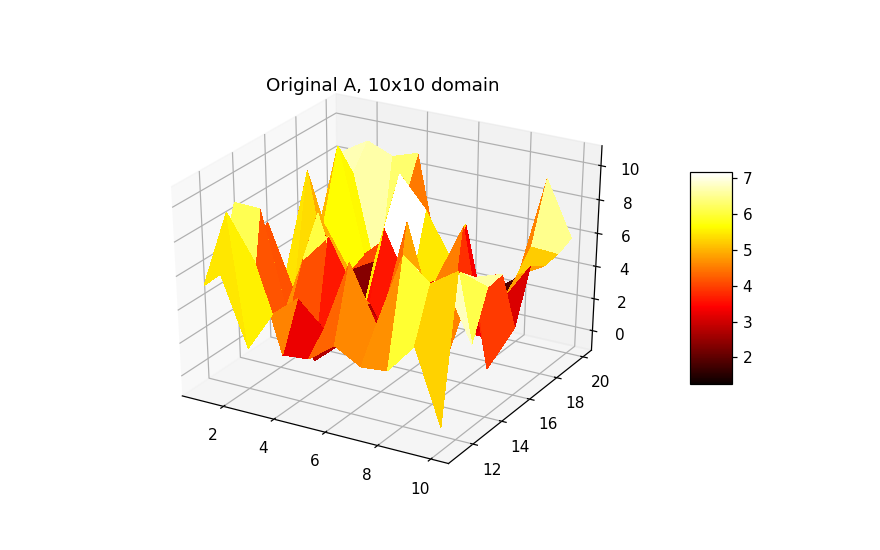

In [14]:
my_plot_surf(A, title='Original A, 10x10 domain')

<IPython.core.display.Javascript object>


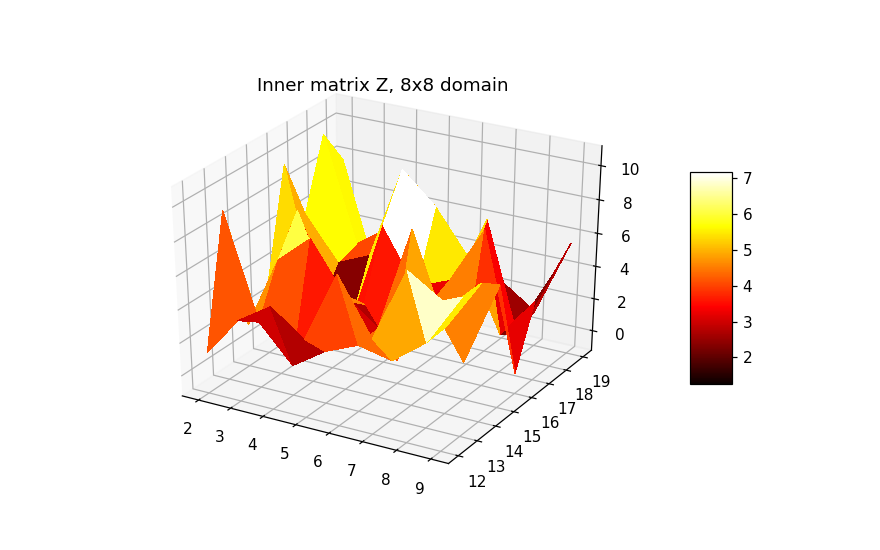

In [15]:
my_plot_surf(Z, x_start=2, y_start=12, title='Inner matrix Z, 8x8 domain')

In [16]:
Z

array([[1.25467718, 3.67356541, 4.96538496, 3.5025541 , 7.77045464,
        4.49001763, 8.86774787, 7.59563926],
       [8.9539692 , 2.77101012, 0.60122376, 1.94552051, 2.79928046,
        2.36160811, 3.91342822, 7.02892054],
       [1.33651945, 5.72887411, 7.41698133, 4.54327591, 2.97656265,
        9.24933826, 4.00981878, 7.04014588],
       [2.80114051, 7.90855229, 3.15651689, 3.16702973, 0.21492288,
        4.17638347, 1.0474659 , 6.15992789],
       [9.50823364, 1.2210785 , 0.82237131, 7.16186624, 3.91208529,
        4.73553826, 8.17618114, 0.01271364],
       [5.81438371, 3.27657814, 4.14591435, 9.70599438, 7.9466833 ,
        5.35100035, 1.09716496, 3.58370131],
       [9.90776697, 3.67337642, 5.06202433, 1.82089862, 0.96562007,
        6.86991599, 0.23461309, 4.45698887],
       [7.7177659 , 1.21470329, 6.52085461, 0.73464329, 1.54380581,
        2.28545703, 0.93708997, 5.58031005]])

# Do extrapolation

<IPython.core.display.Javascript object>


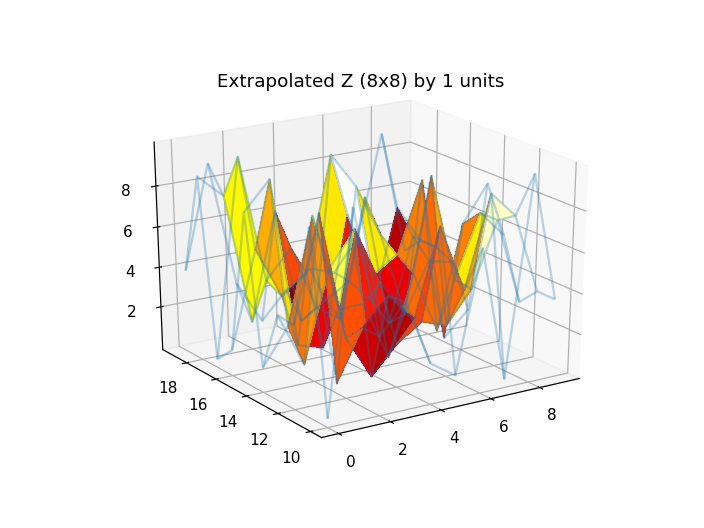

In [17]:
B = extrapolate_xyz(Z=Z, H=1, x_start=1, y_start=11)

In [20]:
Z2, eB = remove_edges(M=B)
print('Z2.shape =', Z2.shape, '     B.shape=',B.shape,'      eB.shape=', eB.shape)
Z

Z2.shape = (8, 8)      B.shape= (10, 10)       eB.shape= (40,)


array([[1.25467718, 3.67356541, 4.96538496, 3.5025541 , 7.77045464,
        4.49001763, 8.86774787, 7.59563926],
       [8.9539692 , 2.77101012, 0.60122376, 1.94552051, 2.79928046,
        2.36160811, 3.91342822, 7.02892054],
       [1.33651945, 5.72887411, 7.41698133, 4.54327591, 2.97656265,
        9.24933826, 4.00981878, 7.04014588],
       [2.80114051, 7.90855229, 3.15651689, 3.16702973, 0.21492288,
        4.17638347, 1.0474659 , 6.15992789],
       [9.50823364, 1.2210785 , 0.82237131, 7.16186624, 3.91208529,
        4.73553826, 8.17618114, 0.01271364],
       [5.81438371, 3.27657814, 4.14591435, 9.70599438, 7.9466833 ,
        5.35100035, 1.09716496, 3.58370131],
       [9.90776697, 3.67337642, 5.06202433, 1.82089862, 0.96562007,
        6.86991599, 0.23461309, 4.45698887],
       [7.7177659 , 1.21470329, 6.52085461, 0.73464329, 1.54380581,
        2.28545703, 0.93708997, 5.58031005]])

# Verify that Z and Z2 are identical and compute RMSE

In [21]:
assert np.all(Z == Z2)

In [22]:
rmse(eA,eB)

3.6280365924379567

In [23]:
mse(eA,eB, squared=False)

3.6280365924379567

# How does RMSE between approximated and actual compare to randomly selected samples?

In [28]:
N=40

x=np.random.uniform(low=0.0, high=10.0, size=40)
y=np.random.uniform(low=0.0, high=10.0, size=40)

rmse(x,y)


4.311929211027909

# Example Below is a slight modifcation from 

https://fda.readthedocs.io/en/latest/auto_examples/plot_extrapolation.html#

In [29]:
import skfda
import mpl_toolkits.mplot3d
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate
%matplotlib notebook

<IPython.core.display.Javascript object>


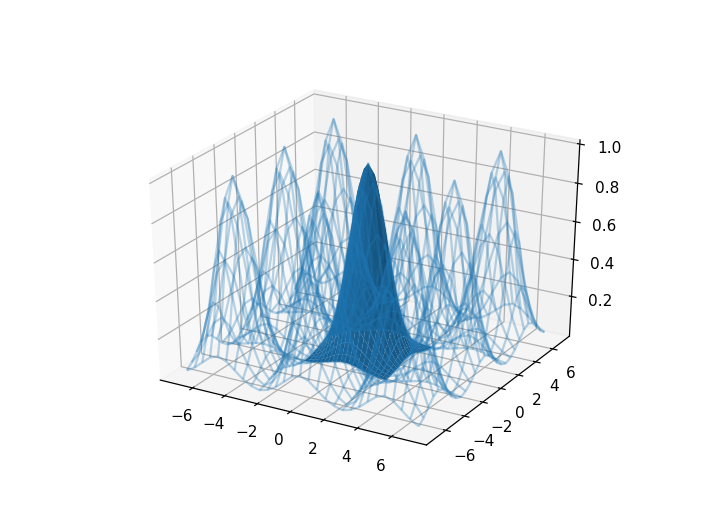

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Make data.
t = np.arange(-2.5, 2.75, 0.25)
X, Y = np.meshgrid(t, t)
Z = np.exp(-0.5 * (X**2 + Y**2))

# Creation of FDataGrid
fd_surface = skfda.FDataGrid([Z], (t, t))

t = np.arange(-7, 7.5, 0.5)

# Evaluation with periodic extrapolation
values = fd_surface((t, t), grid=True, extrapolation="periodic")
T, S = np.meshgrid(t, t)


ax.plot_wireframe(T, S, values[0, ..., 0], alpha=.3, color="C0")
ax.plot_surface(X, Y, Z, color="C0")

<IPython.core.display.Javascript object>


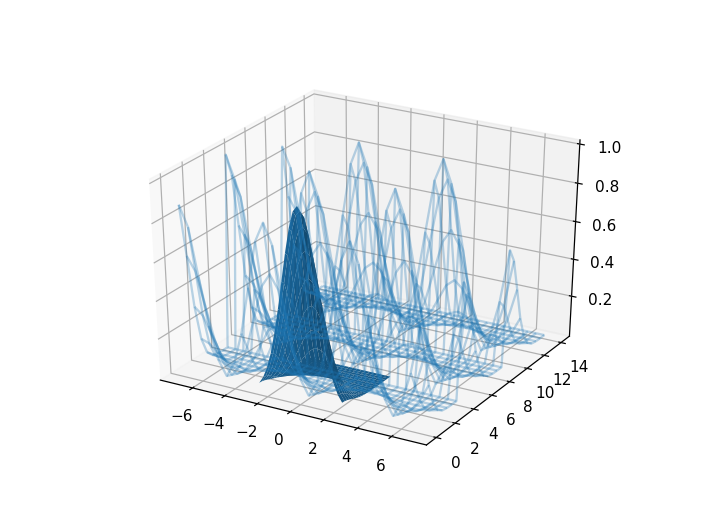

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Make data.
t = np.arange(-2.5, 2.75, 0.25)
t2 = np.arange(-2.5+2.5, 2.75+2.5, 0.25)

X, Y = np.meshgrid(t, t2)
Z = np.exp(-0.5 * (X**2 + Y**2))

# Creation of FDataGrid
fd_surface = skfda.FDataGrid([Z], (t, t))

t = np.arange(-7, 7.5, 0.5)
t2 = np.arange(-7+7, 7.5+7, 0.5)

# Evaluation with periodic extrapolation
values = fd_surface((t, t2), grid=True, extrapolation="periodic")
T, S = np.meshgrid(t, t2)


ax.plot_wireframe(T, S, values[0, ..., 0], alpha=.3, color="C0")
ax.plot_surface(X, Y, Z, color="C0")

<IPython.core.display.Javascript object>


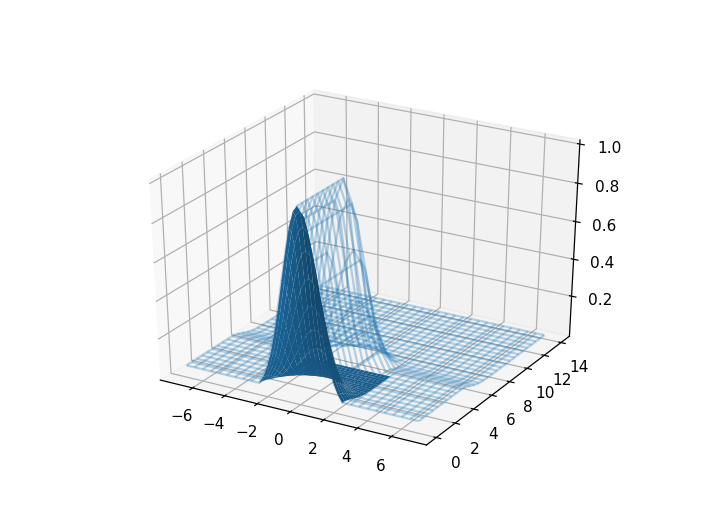

In [32]:
values = fd_surface((t, t), grid=True, extrapolation="bounds")

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(T, S, values[0, ..., 0], alpha=.3, color="C0")
ax.plot_surface(X, Y, Z, color="C0")

<IPython.core.display.Javascript object>


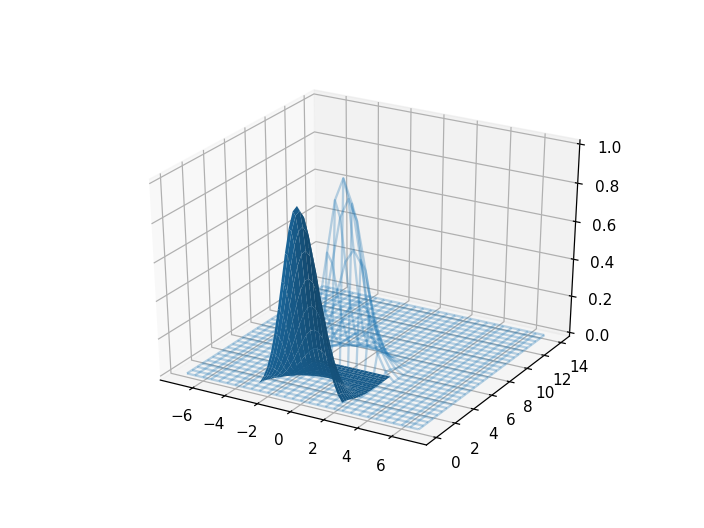

In [33]:
values = fd_surface((t, t), grid=True, extrapolation="zeros")

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(T, S, values[0, ..., 0], alpha=.3, color="C0")
ax.plot_surface(X, Y, Z, color="C0")